#                       <h1><center>**TRAINING NEURAL NETWORK**</center></h1>   




# **ABOUT THE MNIST DATASET**

MNIST dataset, a classic in the machine learning community, which has been around almost as long as the field itself and has been intensively studied. 
It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.
The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9).

![MNIST](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/06/78429blog-5-cover.png)

# **TOPICS IN THIS ASSIGNMENT**
1. Importing and understanding dataset
2. EDA
3. Preparing data
4. Building the model
5. Compiling and fitting the model
6. Prediction on test data
7. Evaluating the model
8. Rebuilding the model(repeating 3-7 steps)

### **How To Load Dataset?**
- Documentation Link - https://www.tensorflow.org/api_docs/python/tf/keras/datasets
- Video link below

# 1. **Importing & Understanding Data**

In [2]:
# Import mnist from tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist

# load the data using mnist.load_data and define train_images, train_labels, test_images, test_labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# check the shape of train_images dataset
train_images.shape

(60000, 28, 28)

In [4]:
# check the shape of train_images single image (train_images[0])
train_images[0].shape

(28, 28)

In [5]:
# let's look at the first image which will show in the array form 
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

**Observation from the array output**
- You can see value in the array ranging from 0-255 depicting RGB color.

In [6]:
# check shape of train_labels
train_labels.shape

(60000,)

In [7]:
# check the labels of train data
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# check shape of test data
test_images.shape

(10000, 28, 28)

In [9]:
# check the labels of test data
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# 2. **EDA**

## **How to plot multiple images of the output(0-9 digits)?**
- Follow the comments below in the code to plot.

[1]
[3]
[5]
[7]
[2]
[0]
[13]
[15]
[17]
[4]


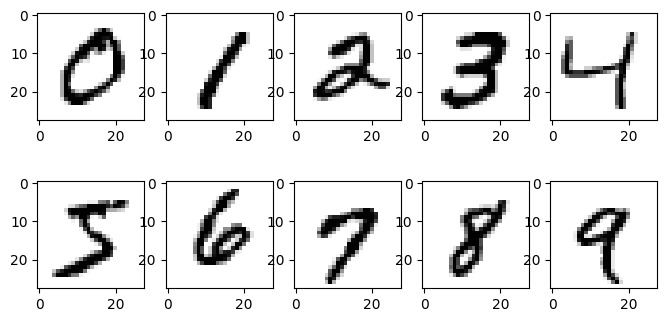

In [11]:
# importing pyplot and numpy for plotting images of 0-9
import matplotlib.pyplot as plt
import numpy as np
# defining subplots (2,5)
fig, ax = plt.subplots(2,5, figsize=(8,4))

# looping over ax.flatten(), and plotting each digit
for i, ax in enumerate(ax.flatten()): # code instead of None
    # choosing each digit occuring at its first instance
    im_idx = np.argwhere(train_labels == i)[0] # code instead of None
    print(im_idx)
    # reshaping the selected digit to (28, 28) from (1, 28, 28)
    plottable_image = np.reshape(train_images[im_idx], (28,28))# code here  
    # now pass this plottable_image to ax.imshow
    ax.imshow(plottable_image, cmap='gray_r')

# 3. **Preparing the data**

## **How to prepare the image for model building?**
- Follow the comments below to understand the process.

In [12]:
# reshape train_images from (60000, 28, 28) to (60000, 28*28)
train_images = train_images.reshape(60000, 28*28)
# convert dtype of train_images from uint8 to float32 
train_images = train_images.astype('float32')/ 255
# reshape test_images from (10000, 28, 28) to (10000, 28*28)
test_images = test_images.reshape(10000, 28*28)
# convert dtype of test_images from uint8 to float32 
test_images = test_images.astype('float32')/255

# 4.**Model 1: Building the model** 

![](https://zitaoshen.rbind.io/project/machine_learning/how-to-build-your-own-neural-net-from-the-scrach/featured.png)

### **How To Build Model?**
- Documentation Link - https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
- Watch the video below & follow the steps in code cells later.

**Let's import necessary libraries and define our model by following the comments**

In [13]:
# importing keras and layers from tensorflow
from tensorflow import keras
from tensorflow.keras import layers

# define the model and its network architecture
# define two dense layers having first layer with 512 neurons & activation='relu'
# second layer with 10 neurons & activation = 'softmax'
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 5. **Compiling & fitting the model**

**In the next cell, we will compile our model.**

In [14]:
# compile the model with optimizer='rmsprop', loss='sparse_categorical_crossentropy', & metrics=['accuracy']
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Then we will fit our model**

In [16]:
# fit the model with epochs=10, batch_size=128
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2650 - accuracy: 0.9248
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1073 - accuracy: 0.9683
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0707 - accuracy: 0.9791
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0513 - accuracy: 0.9848
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0384 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0295 - accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0223 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0170 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0126 - accuracy: 0.9969
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0092 - accuracy: 0.9977

# 6. **Prediction on test data**

**In the next cell, we will take first 10 images of test data**

In [17]:
# define a variable test_digits and store the first 10 images of test data
test_digits = test_images[0:10]

**Then we will predict on those 10 images**

In [18]:
# predict the test_digits using our model
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 117ms/step


**We will check prediction on first image in next cell**

In [19]:
# check the first image prediction from predictions
predictions[0]

array([9.5006323e-09, 2.0705554e-11, 3.5401570e-07, 4.9726121e-05,
       5.3811881e-13, 2.4584784e-08, 1.8825104e-14, 9.9990380e-01,
       1.1260894e-07, 4.6074481e-05], dtype=float32)

**Previous output shows probability of first image being either one of 0-9 digits. For example, probability of first image being 0 is 1.83151341e-10 which is very very low.**

In [21]:
# checking the index having maximum prediction 
predictions[0].argmax()

7

**In next cell, we can see the maximum prediction for first image is 0.99 at index 7 showing that first image is digit 7.**

In [22]:
# checking the index value having maximum prediction
predictions[0][7] 

0.9999038

**In next cell, we are confirming whether our prediction is right or wrong by checking label.**

In [23]:
# checking the label for that index having maximum prediction
test_labels[0] 

7

# 7. **Evaluating the model**

**Now we evaluate our model on unseen data, which is test set.**

In [24]:
# check the loss and accuracy for test data using model.evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0636 - accuracy: 0.9806


In [25]:
# print test accuracy
print(test_acc)

0.9805999994277954


## **Observation from evaluation**
- We can see that our train accuracy is 99.7% and our test accuracy is 98.2% which clearly shows the case of overfitting. 

# **REGULARIZATION**
Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. It is a way to overcome overfitting problem in machine learning/deep learning problem. This in turn improves the model’s performance on the unseen data as well.

**Overfittng:** It is a situation where your model performed exceptionally well on train data but was not able to predict test data. 

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-03-at-7.52.01-PM-e1522832332857.png)

## **How do we deal with reglarization?**

There are multiple ways to deal with regularization
- L2 & L1 regularization
- Dropouts
- Early stopping
- Data augmentation

Besides these ways, tweaking the architecture is a natural way to avoid overfitting. Here we just gave you an overview of regularization. We will cover this detail in another assignment.

## **Here we will just tweak our architecture to show you how you can avoid overfitting. This is an excellent way to learn how you can train the network with different architectures.**

# 8. **Model 2: Rebuilding another model**

In [26]:
# build 2nd model 
# architecture: total 3 dense layers, 
# first 2 layers with 128, 128 neurons with activation='relu'
# and last layer with 10 neurons and activation='softmax'
model2 = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [27]:
# compiling model2 with optimizer='rmsprop', loss='sparse_categorical_crossentropy' and metrics=['accuracy']
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
# fitting model 2 with epochs=6, batch_size=128
model2.fit(train_images, train_labels, epochs=6, batch_size=128)

Epoch 1/6
469/469 [==============================] - 2s 2ms/step - loss: 0.3005 - accuracy: 0.9140
Epoch 2/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1260 - accuracy: 0.9618
Epoch 3/6
469/469 [==============================] - 2s 3ms/step - loss: 0.0875 - accuracy: 0.9732
Epoch 4/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 0.9794
Epoch 5/6
469/469 [==============================] - 1s 3ms/step - loss: 0.0522 - accuracy: 0.9836
Epoch 6/6
469/469 [==============================] - 2s 3ms/step - loss: 0.0431 - accuracy: 0.9865


In [30]:
# check the loss and accuracy for test data using model2.evaluate
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 753us/step - loss: 0.0865 - accuracy: 0.9741


[0.0864846408367157, 0.9740999937057495]

## **Observation from evaluation**
- We can see the gap between train accuracy & test accuracy falling down from 1.5% in our first model to 0.9% this time. Overfitting is still a problem so we will do some more changes in our architecture. 

# 9. **Model 3: Rebuilding another model**

In [32]:
# Build 3rd model
# add 3 dense layers in which 
# first 2 layers with 64 neurons and activation = 'relu'
# last layer with 10 neurons and activation='softmax'
model3 = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

In [36]:
# compiling model3 with optimizer='rmsprop', loss='sparse_categorical_crossentropy' and metrics=['accuracy']
model3.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [37]:
# fitting the model 3 with epochs = 5 and batch_size=128
model3.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3727 - accuracy: 0.8976
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1737 - accuracy: 0.9494
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1280 - accuracy: 0.9625
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1012 - accuracy: 0.9701
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0849 - accuracy: 0.9751


In [38]:
# check the loss and accuracy for test data using model3.evaluate
model3.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 639us/step - loss: 0.0993 - accuracy: 0.9712


[0.09925239533185959, 0.9711999893188477]

## **Observation from evaluation**
- We can see the gap between train accuracy & test accuracy falling down from 0.9% in our 2nd model to 0.5% this time. Let's try to reduce this gap also.

# 10. **Model 4: Rebuilding another model**

In [39]:
# Build 4th model
# add 2 dense layers in which 
# first layer with 128 neurons and activation = 'relu'
# last layer with 10 neurons and activation='softmax'
model4 = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

In [40]:
# compiling model4 with optimizer='rmsprop', loss='sparse_categorical_crossentropy' and metrics=['accuracy']
model4.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [41]:
# fitting the model 4th with epochs = 5 and batch_size=128
model4.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 2ms/step - loss: 0.3389 - accuracy: 0.9073
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1609 - accuracy: 0.9541
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1139 - accuracy: 0.9675
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9747
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0718 - accuracy: 0.9790


In [42]:
# check the loss and accuracy for test data using model4.evaluate
model4.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 718us/step - loss: 0.0818 - accuracy: 0.9745


[0.08182765543460846, 0.9745000004768372]

## **Observation from evaluation**
- We can see the gap between train accuracy & test accuracy falling down from 0.5% in our fourth model to 0.4% this time. You can also try different architecture and play with it to see how it works. Learn from such insights.

# **CONCLUSION FROM THIS ASSIGNMENT**
- We saw that how model complexity i.e. no. of layers and neurons affect our model.
- Increasing no. of neurons/layers can make our model overfit the data.  